In [14]:

import os
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
TIEMPOS_DIR = "./tiempos"

procesos = os.listdir(TIEMPOS_DIR)
# print(procesos)

all_data = []   
for p in procesos:
    path_tiempos = os.path.join(TIEMPOS_DIR, p)
    csv_path = os.path.join(path_tiempos, "tiempos.csv")
    df = pd.read_csv(csv_path)
    df['p'] = int(p)
    all_data.append(df)


df_all = pd.concat(all_data, ignore_index=True)
print(df_all)

       N     tiempo  p
0   5000   6.830288  6
1  10000  11.156554  6
2   5000   6.063671  2
3  10000  12.409325  2
4   5000   6.055432  4
5  10000  10.311134  4


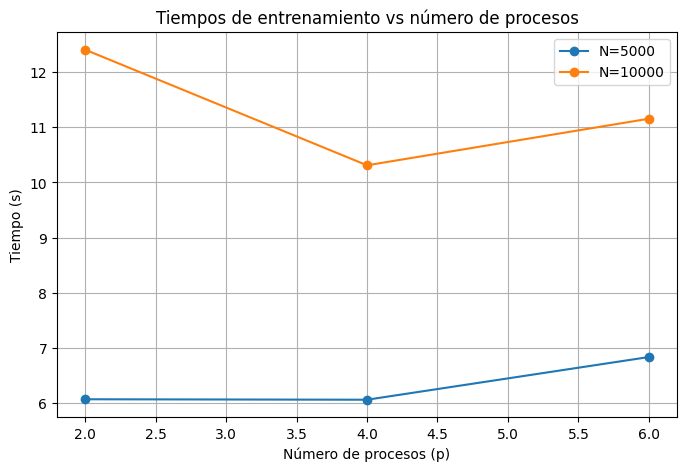

In [26]:
plt.figure(figsize=(8,5))
for n in df_all['N'].unique():
    df_n = df_all[df_all['N'] == n].sort_values('p') 
    plt.plot(df_n['p'], df_n['tiempo'], marker='o', label=f"N={n}")

plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempos de entrenamiento vs número de procesos")
plt.legend()
plt.grid(True)
plt.show()

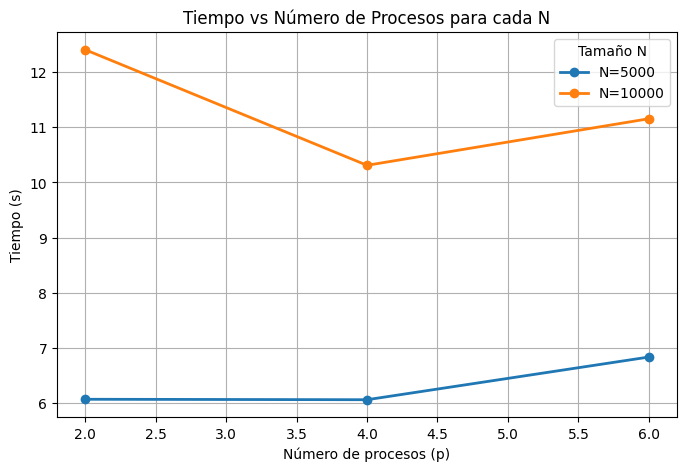

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for n in sorted(df_all['N'].unique()):
    df_n = df_all[df_all['N'] == n].sort_values('p') 
    plt.plot(df_n['p'], df_n['tiempo'], marker='o', label=f"N={n}", linewidth=2)

plt.xlabel("Número de procesos (p)")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs Número de Procesos para cada N")
plt.legend(title="Tamaño N")
plt.grid(True)
plt.show()
